In [5]:
from tensorflow.keras import datasets
# datasets.
(x_tr, y_tr), (x_te, y_te) = datasets.boston_housing.load_data()
print(x_tr.shape, x_te.shape)

(404, 13) (102, 13)


In [6]:
# 보스턴 지역 집값 예측 - 회귀
from tensorflow.keras import datasets
(x_tr, y_tr), (x_te, y_te) = datasets.boston_housing.load_data(test_split = 0.1)
print(x_tr.shape, x_te.shape) # te_shape의 행이 반으로 줄엇다. 

(455, 13) (51, 13)


In [9]:
# 표준화 전처리
mean = x_tr.mean(axis=0)
x_tr -= mean
std = x_tr.std(axis=0)
x_tr /= std # 표준화 : 평균 0, 표준편차 1

x_te -= mean
x_te /= std

# test 데이터를 train 데이터의 mean과 std로 한 이유는 기준을 동일하게 해야한다. 
# 원래는 train과 test의 mean과 std로 해야함.

In [17]:
from tensorflow.keras import models, layers
model = models.Sequential() # 순차처리객체
model.add( layers.Dense(
    64, 
    input_shape=(x_tr.shape[1],),     # input_shape에는 튜플
    activation='relu' ) )
model.add(layers.Dense(64, activation='relu'))
# 회귀 경우, 마지막 출력은 1, activation 생략
model.add(layers.Dense(1))   # 회귀이기에 linear이고 linear는 기본값이여서 생략 가능
# model.compile(optimizer='sgd') # batch_size 만큼 읽어서 

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
hist = model.fit(
    x_tr,
    y_tr,
    epochs=50,
    batch_size=50,  # batch_size를 주지않으면 train 데이터를 한꺼번에 읽음
    validation_split=0.2
)

Epoch 1/50
8/8 [==============================] - 1s 29ms/step - loss: 564.7766 - mae: 21.8206 - val_loss: 496.0234 - val_mae: 20.9332
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 529.1107 - mae: 20.9893 - val_loss: 462.9356 - val_mae: 20.1018
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 490.7708 - mae: 20.0669 - val_loss: 424.6356 - val_mae: 19.1042
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 446.6294 - mae: 18.9395 - val_loss: 379.2227 - val_mae: 17.8820
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 392.7318 - mae: 17.5434 - val_loss: 324.9995 - val_mae: 16.3896
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 329.2133 - mae: 15.8347 - val_loss: 262.4933 - val_mae: 14.5335
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 258.7845 - mae: 13.8025 - val_loss: 197.8718 - val_mae: 12.4093
Epoch 8/50
8/8 [==============================] - 0s 5ms/step

In [18]:
model.evaluate(x_te, y_te)

2/2 [==============================] - 0s 2ms/step - loss: 39.5432 - mae: 3.9981


[39.54320526123047, 3.998096227645874]

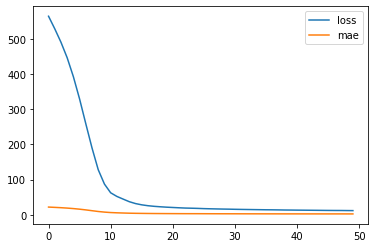

In [19]:
import matplotlib.pyplot as plt
plt.plot( hist.history['loss'], label = 'loss')
plt.plot( hist.history['mae'], label = 'mae')
plt.legend()
plt.show()

In [21]:
pred = model.predict(x_te)
from sklearn.metrics import r2_score
r2_score(pred, y_te)

0.5721809632634712

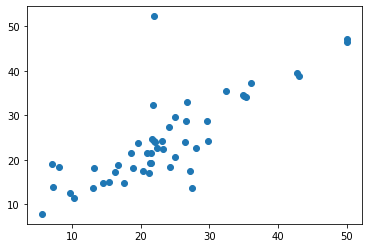

In [25]:
plt.scatter( y_te, pred, label='pred')
# plt.scatter( y_tr, y_te, label='y_test')